# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [ ]:
import pandas as pd
import numpy as np
import os
import glob


In [ ]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [ ]:
# Write your answer here

### Method to extract the data from several csv files and concatenate them

In [ ]:
def extraction_ebola(directory_name, country_name):
    
    files = [fn for fn in glob.glob(directory_name)]
    df_from_each_file = (pd.read_csv(f) for f in files)
    df = pd.concat(df_from_each_file, ignore_index=True)

    ##### Adding the Country name to the data frame
    country = [country_name] * len(df)
    country_df = pd.DataFrame({'country': country})
    df.join(country_df)
    
    return df
    

### Extract data of each country

In [ ]:
guinea_df = extraction1('Data/ebola/guinea_data/*', 'Guinea')
liberia_df = extraction1('Data/ebola/liberia_data/*', 'Liberia')
sierra_leone_df = extraction1('Data/ebola/sl_data/*', 'Sierra Leone')


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
# Write your answer here

### Extraction of the spreadsheets

In [ ]:
def extraction_microbiome(directory_name, exclude_file):
    
    files = [fn for fn in glob.glob(directory_name) if not os.path.basename(fn).startswith(exclude_file)]
    df_from_each_file = (pd.read_excel(f, names = ['name', 'number']) for f in files)
    df = pd.concat(df_from_each_file, ignore_index=True)
    
    return df

In [ ]:
MID = extraction_microbiome('Data/microbiome/*.xls', 'metadata')

### Addition of the information from metadata.xls

In [ ]:
## Extraction microbiome n'est en fait pas une solution optimale. Pour ajouter les metadata par la suite il faut 
# la taille de chaque fichier Excel. 

### Second method

In [ ]:
MID1 = pd.read_excel('Data/microbiome/MID1.xls', names = ['name', 'number'])
MID2 = pd.read_excel('Data/microbiome/MID2.xls', names = ['name', 'number'])
MID3 = pd.read_excel('Data/microbiome/MID3.xls', names = ['name', 'number'])
MID4 = pd.read_excel('Data/microbiome/MID4.xls', names = ['name', 'number'])
MID5 = pd.read_excel('Data/microbiome/MID5.xls', names = ['name', 'number'])
MID6 = pd.read_excel('Data/microbiome/MID6.xls', names = ['name', 'number'])
MID7 = pd.read_excel('Data/microbiome/MID7.xls', names = ['name', 'number'])
MID8 = pd.read_excel('Data/microbiome/MID8.xls', names = ['name', 'number'])
MID9 = pd.read_excel('Data/microbiome/MID9.xls', names = ['name', 'number'])

frames = [MID1, MID2, MID3, MID4, MID5, MID6, MID7, MID8, MID9]
MID_df = pd.concat(frames)



## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

NameError: name 'DATA_FOLDER' is not defined

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

#### 1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 

In [3]:
titanicData = pd.read_excel('Data/titanic.xls')
titanicData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Attributes that can be Categorical :
- survived
- sex -> transform sex attribut (female=0 male=1)
- age
- embarked
- boat

In [4]:
# Change sex attribut to a categorical attribut

titanicData['sex'] = titanicData['sex'].replace('female', 0)
titanicData['sex'] = titanicData['sex'].replace('male', 1)

titanicData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

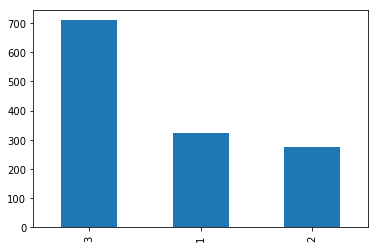

In [5]:
# Histograms for travel class attributes

df = titanicData.pclass.astype('category')
df.value_counts().plot(kind='bar')

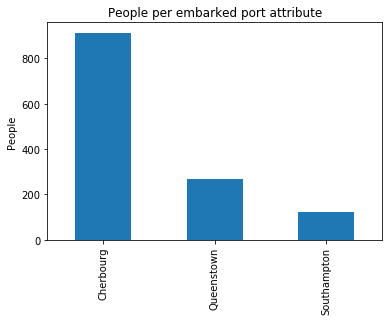

In [6]:
# Histograms for embarkation port attributes (Cherbourg Queenstown Southampton)

df = titanicData.embarked.astype('category')
embarkedPlot = df.value_counts().plot(kind='bar')
embarkedPlot.set_title("People per embarked port attribute")
embarkedPlot.set_ylabel("People")
embarkedPlot.set_xticklabels(["Cherbourg", "Queenstown", "Southampton"])

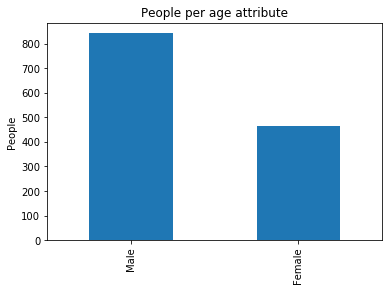

In [7]:
# Histograms for sex attributes

df = titanicData.sex.astype('category')
sexPlot = df.value_counts().plot(kind='bar')
sexPlot.set_title("People per age attribute")
sexPlot.set_ylabel("People")
sexPlot.set_xticklabels(["Male", "Female"])

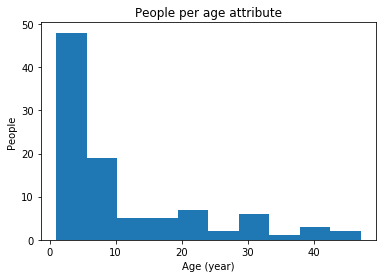

In [8]:
# Histograms for age attributes

df = titanicData.age.astype('category')
agePlot = df.value_counts().plot(kind='hist')
agePlot.set_title("People per age attribute")
agePlot.set_ylabel("People")
agePlot.set_xlabel("Age (year)")

#### 3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

#### 4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.

In [9]:
nbSurvivors = np.zeros(3,)
    
for pclass in range(1,4):
    nbSurvivors[pclass-1] = titanicData.query('pclass == @pclass').query('survived == 1').shape[0]

print("number of survivors : ", nbSurvivors)

number of survivors :  [ 200.  119.  181.]


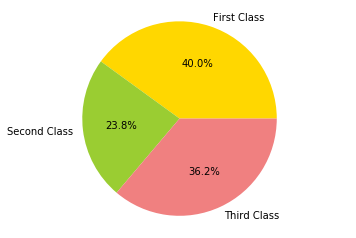

In [10]:
labels = 'First Class', 'Second Class', 'Third Class'
colors = ['gold', 'yellowgreen', 'lightcoral']

plt.pie(nbSurvivors,labels=labels, colors=colors,autopct='%1.1f%%')
 
plt.axis('equal')
plt.show()

#### 5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

In [11]:
nbSurvivors = np.zeros((3,2))
    
for pclass in range(1,4):
    for gender in range(2):
        nbSurvivors[pclass - 1, gender] = titanicData.query('pclass == @pclass').query('sex == @gender').query('survived == 1').shape[0]

print("number of survivors [female][male]: \n", nbSurvivors)

np.arange(nbSurvivors.shape[0])


number of survivors [female][male]: 
 [[ 139.   61.]
 [  94.   25.]
 [ 106.   75.]]


array([0, 1, 2])

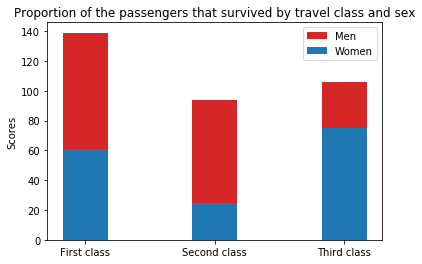

In [12]:
ind = np.arange(nbSurvivors.shape[0])
width = 0.35       

p1 = plt.bar(ind, nbSurvivors[:,0], width, color='#d62728')
p2 = plt.bar(ind, nbSurvivors[:,1], width,)

plt.ylabel('Scores')
plt.title('Proportion of the passengers that survived by travel class and sex')
plt.xticks(ind, ('First class', 'Second class', 'Third class'))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()


#### 6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

J'ai supprimé toutes les lignes où un survivant n'avait pas d'âge, je vois pas trop comment faire en sorte de récupérer ces données proprement.

In [13]:
def survivals_proportions(data):

    ratioClass, ratioSex, nb = np.zeros(3), np.zeros(2), int(data.shape[0]/2)

    # Survival proportions by age category 
    ratioAge = data.query('survived == 1').shape[0]/nb # nb people alive / nb people total
    
    # Survival proportions by travel class
    for pclass in range(1,4):
        nb = data[data.pclass == pclass].shape[0]
        ratioClass[pclass-1] = data.query('pclass == @pclass').query('survived == 1').shape[0]/nb

    # Survival proportions by sex
    for sex in range(2):
        nb = data[data.sex == sex].shape[0]
        ratioSex[sex] = data.query('sex == @sex').query('survived == 1').shape[0]/nb
                      
    return ratioAge, ratioClass, ratioSex

In [18]:
# Keep only people who's don't have nan value for age and sort datafram by age
titanicDataClean = titanicData.dropna(subset = ['age']).sort_values(['age'])

nb = int(titanicDataClean.shape[0]/2)

ratioAge, ratioClass, ratioSex = np.zeros((2,1)), np.zeros((2,3)), np.zeros((2,2))

# First age category
ratioAge[0], ratioClass[0,:], ratioSex[0,:] = survivals_proportions(titanicDataClean.head(nb))

# Second age category
ratioAge[1], ratioClass[1,:], ratioSex[1,:] = survivals_proportions(titanicDataClean.tail(nb))

print(ratioAge, end = '\n\n')
print(ratioClass, end = '\n\n')
print(ratioSex)

[[ 0.82375479]
 [ 0.81226054]]

[[ 0.76056338  0.51612903  0.29573171]
 [ 0.59624413  0.37226277  0.19653179]]

[[ 0.70792079  0.22429907]
 [ 0.80107527  0.18694362]]
